## Brief note on the Problem Statment
* Task : - <b>Imbalanced Classification (is_promoted[0,1])</b>

<p>Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:</p>

1. They first identify a set of employees based on recommendations/ past performance Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical

2. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion


## Hypothesis on the approach and breif description on some thoughts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("./train_LZdllcl.csv")

In [3]:
raw_data.head(4)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0


In [4]:
raw_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

## EDA and Breif notes on the findings!

In [5]:
raw_data.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [6]:
raw_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
raw_data.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [8]:
#filling missing education value with mode
raw_data['education'] = raw_data['education'].fillna("Bachelor's")

In [9]:
raw_data.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
##filling previous_year_rating value with mode
raw_data['previous_year_rating'] = raw_data['previous_year_rating'].fillna(3)

In [11]:
raw_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [12]:
from sklearn import model_selection

In [13]:
feature_list1 = ['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score']

In [14]:
raw_data[feature_list1].dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [15]:
raw_data[feature_list1].head(3)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50


In [16]:
raw_data['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [17]:
for x in feature_list1:
    if raw_data[x].dtype!='float64':
        #print(df_raw[[x,Target[0]]].groupby(x, as_index = False).mean())
        print(raw_data[[x,'is_promoted']].groupby(x, as_index = False).mean())
        print("-"*30,"\n")

          department  is_promoted
0          Analytics     0.095665
1            Finance     0.081230
2                 HR     0.056245
3              Legal     0.051011
4         Operations     0.090148
5        Procurement     0.096386
6                R&D     0.069069
7  Sales & Marketing     0.072031
8         Technology     0.107593
------------------------------ 

       region  is_promoted
0    region_1     0.095082
1   region_10     0.078704
2   region_11     0.056274
3   region_12     0.066000
4   region_13     0.086858
5   region_14     0.074970
6   region_15     0.079060
7   region_16     0.069625
8   region_17     0.136935
9   region_18     0.032258
10  region_19     0.060641
11   region_2     0.080126
12  region_20     0.057647
13  region_21     0.043796
14  region_22     0.114188
15  region_23     0.116596
16  region_24     0.035433
17  region_25     0.125763
18  region_26     0.063274
19  region_27     0.078963
20  region_28     0.116844
21  region_29     0.043260
22   r

In [19]:
#data['FareBin'] = pd.qcut(data['Fare'], 4)


In [20]:
pd.cut(raw_data['age'].astype(int), 5)

0         (28.0, 36.0]
1         (28.0, 36.0]
2         (28.0, 36.0]
3         (36.0, 44.0]
4         (44.0, 52.0]
5         (28.0, 36.0]
6         (28.0, 36.0]
7         (28.0, 36.0]
8        (19.96, 28.0]
9         (28.0, 36.0]
10        (28.0, 36.0]
11        (28.0, 36.0]
12        (44.0, 52.0]
13        (36.0, 44.0]
14        (36.0, 44.0]
15        (36.0, 44.0]
16        (36.0, 44.0]
17        (28.0, 36.0]
18        (28.0, 36.0]
19        (36.0, 44.0]
20        (28.0, 36.0]
21        (36.0, 44.0]
22       (19.96, 28.0]
23       (19.96, 28.0]
24        (36.0, 44.0]
25       (19.96, 28.0]
26        (28.0, 36.0]
27        (28.0, 36.0]
28        (28.0, 36.0]
29       (19.96, 28.0]
             ...      
54778     (28.0, 36.0]
54779     (28.0, 36.0]
54780     (36.0, 44.0]
54781     (36.0, 44.0]
54782    (19.96, 28.0]
54783    (19.96, 28.0]
54784     (36.0, 44.0]
54785     (28.0, 36.0]
54786     (28.0, 36.0]
54787    (19.96, 28.0]
54788    (19.96, 28.0]
54789     (28.0, 36.0]
54790     (

In [ ]:
raw_data['age'].min()

In [ ]:
raw_data['age'].value_counts()

In [21]:
raw_data.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [22]:
def Box_num_graphs(df):
    for d in df.select_dtypes(include=['float64','int']).columns:
        df.boxplot(column=d,return_type='axes')
        plt.show()
        input("Press enter to continue")

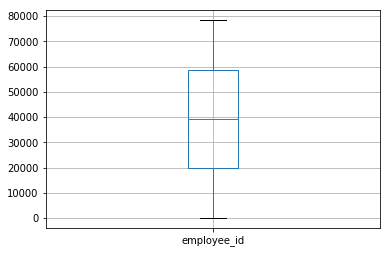

Press enter to continue


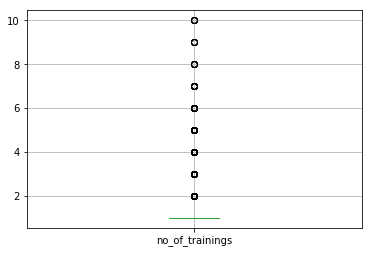

Press enter to continue


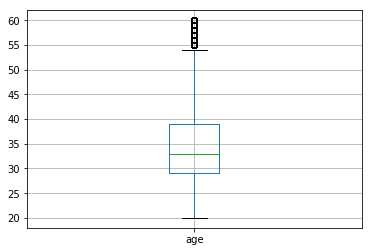

Press enter to continue


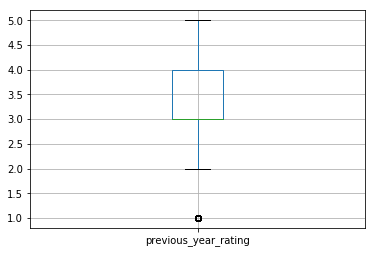

Press enter to continue


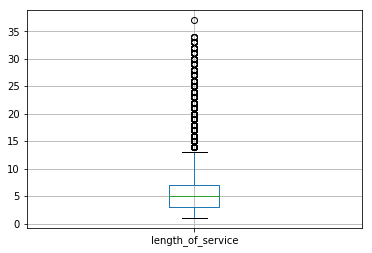

Press enter to continue


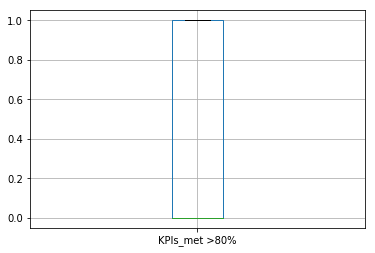

Press enter to continue


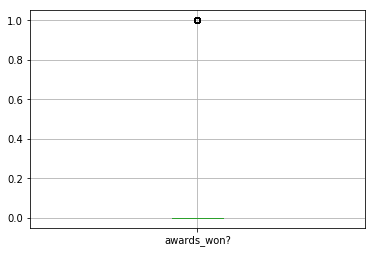

Press enter to continue


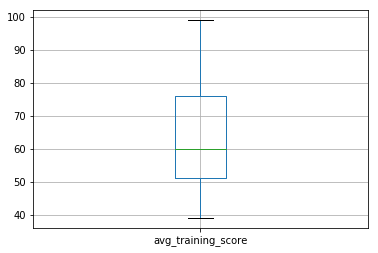

Press enter to continue


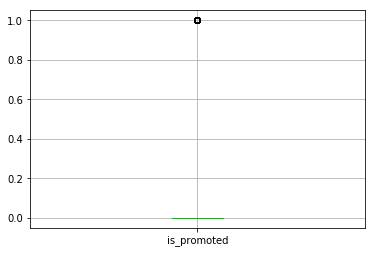

Press enter to continue


In [23]:
Box_num_graphs(raw_data)

In [26]:
raw_data.drop(["employee_id"], inplace=True, axis=1)

In [27]:
raw_data.head(5)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [28]:
cat_vars = ['department','region','education',
            'recruitment_channel','awards_won?']

In [31]:
for i in cat_vars:
    print(raw_data[i].value_counts())
    print('-'*100)
    print("\n")

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
----------------------------------------------------------------------------------------------------


region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      

In [33]:
raw_data.drop(['region'], inplace=True, axis=1)

In [35]:
cat_vars = ['department','education',
            'recruitment_channel','awards_won?']
for i in cat_vars:
    print(raw_data[i].value_counts())
    print('-'*100)
    print("\n")

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
----------------------------------------------------------------------------------------------------


Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64
----------------------------------------------------------------------------------------------------


other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64
----------------------------------------------------------------------------------------------------


0    53538
1     1270
Name: awards_won?, dtype: int64
----------------------------------------------------------------------------------------------------




In [36]:
raw_data.head(4)

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0


In [37]:
from fastai.imports import*
from fastai.structured import *

In [38]:
data_backup = raw_data.copy()

In [39]:
train_cats(raw_data)

In [40]:
raw_data.head(4)

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0


In [41]:
help(train_cats)

Help on function train_cats in module fastai.structured:

train_cats(df)
    Change any columns of strings in a panda's dataframe to a column of
    catagorical values. This applies the changes inplace.
    
    Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values.
    
    Examples:
    ---------
    
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    
    note the type of col2 is string
    
    >>> train_cats(df)
    >>> df
    
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    
    now the type of col2 is category



In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [44]:
lenc = LabelEncoder()
ohenc = OneHotEncoder()

In [48]:
data_encoded = pd.get_dummies(raw_data)

In [49]:
data_encoded.head(5)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,...,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,1,0,0,0,1,1,0,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,1,0,1,0,0,0,1,0,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,1,0,1,0,0,0,1,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,1,1,0,0,0,1,1,0,0


In [50]:
data_encoded.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [97]:
c_0, c_1 = data_encoded.is_promoted.value_counts()

In [98]:
de_0 = data_encoded[data_encoded['is_promoted']==0]
de_1 = data_encoded[data_encoded['is_promoted']==1]

In [103]:
#Random undersampling 
de_und = de_0.sample(c_1)

In [104]:
de_und_test = pd.concat([de_und,de_1],axis=0)

In [105]:
de_und_test.is_promoted.value_counts()

1    4668
0    4668
Name: is_promoted, dtype: int64

In [69]:
de_ovr = de_1.sample(c_0, replace=True)

In [70]:
len(de_ovr)

50140

In [71]:
de_ovr_test = pd.concat([de_ovr,de_0],axis=0)

In [72]:
len(de_ovr_test)

100280

In [73]:
from sklearn.decomposition import  PCA

In [74]:
pca = PCA(n_components=2)

In [75]:
X= pca.fit_transform(de_und_test)

In [76]:
import matplotlib.pyplot as plt

In [86]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

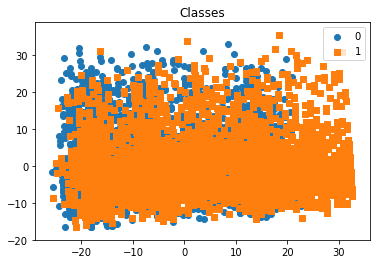

In [87]:
plot_2d_space(X,de_und_test["is_promoted"])

In [112]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,precision_score

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(de_und_test.drop(["is_promoted"], axis=1),
                                                   de_und_test["is_promoted"],random_state = 42)

In [107]:
model1 = XGBClassifier()
model1.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [108]:
pred = model1.predict(X_test)

/Users/virajdattkohir/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [109]:
f1_score(Y_test,pred)

0.8394777265745008

In [111]:
accuracy_score(Y_test,pred)

0.8209083119108826

In [113]:
precision_score(Y_test,pred)

0.7638015373864431

In [114]:
test_data = pd.read_csv("./test_2umaH9m.csv")

In [115]:
test_data.head(4)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65


In [116]:
test_data.drop(["employee_id"], inplace=True, axis=1)

In [117]:
test_data.drop(["region"], inplace=True, axis=1)

In [118]:
test_encoded = pd.get_dummies(test_data)

In [119]:
test_encoded

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,24,NaN,1,1,0,77,0,0,0,...,0,1,1,0,0,0,1,0,0,1
1,1,31,3.0,5,0,0,51,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,1,31,1.0,4,0,0,47,0,0,0,...,1,0,1,0,0,0,1,1,0,0
3,3,31,2.0,9,0,0,65,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,1,30,4.0,7,0,0,61,0,1,0,...,0,0,1,0,0,0,1,0,0,1
5,1,36,3.0,2,0,0,68,0,0,0,...,0,0,1,0,0,0,1,0,0,1
6,1,33,5.0,3,1,0,57,0,1,0,...,0,0,1,0,0,0,1,1,0,0
7,2,36,3.0,3,0,0,85,1,0,0,...,0,0,1,0,0,0,1,0,0,1
8,1,51,4.0,11,0,0,75,0,0,0,...,0,1,0,0,1,0,1,1,0,0
9,1,29,5.0,2,1,0,76,0,0,0,...,0,1,1,0,0,0,1,0,0,1


In [122]:
predictions1 = model1.predict(test_encoded)

/Users/virajdattkohir/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [123]:
pd.DataFrame(predictions1).to_excel("./subimission_01.xlsx")